In [1]:
import hoomd, hoomd.htf, hoomd.md
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import scipy.stats as ss
import tensorflow as tf

# Particles in Harmonic Well

In [68]:
# set-up graph
directory = 'normal'
graph = hoomd.htf.graph_builder(0)
positions = tf.Variable(tf.zeros_like(graph.positions), validate_shape=False, name='positions', trainable=False)
# save positions
save_pos = positions.assign(graph.positions)
# Energy is distance from origin squared
energy = tf.reduce_sum(tf.norm(graph.positions[:,:2], axis=1))
forces = graph.compute_forces(energy)
graph.save(directory,force_tensor=forces, out_nodes=[save_pos])

Note: Backed-up normal previous model to normal/previous_model_10


In [69]:
# set-up initial distribution
p0bar = [[1,0], [0.1,0.1]]
q0bar = [[-3, -1.5], [0.05, 0.05]]
N = 512 # number of particles
T = 1000 # length of trajectories
P = 32 # period of saving positions

snapshot = hoomd.data.make_snapshot(N=N,
                                    box=hoomd.data.boxdim(Lx=100,
                                                          Ly=100,
                                                          Lz=1),
                                    particle_types=['A'])
q0 = np.zeros((N,3))
q0[:,0] = ss.norm.rvs(scale=q0bar[1][0], loc=q0bar[0][0], size=N)
q0[:,1] = ss.norm.rvs(scale=q0bar[1][1], loc=q0bar[0][1], size=N)
p0 = np.zeros((N,3))
p0[:,0] = ss.norm.rvs(scale=p0bar[1][0], loc=p0bar[0][0], size=N)
p0[:,1] = ss.norm.rvs(scale=p0bar[1][1], loc=p0bar[0][1], size=N)

snapshot.particles.position[:] = q0
snapshot.particles.velocity[:] = p0
snapshot.particles.typeid[:] = 0
system = hoomd.init.read_snapshot(snapshot)

notice(2): Group "all" created containing 512 particles


In [70]:
# run Hoomd-blue simulation
c = hoomd.context.initialize('--mode=cpu')
with hoomd.htf.tfcompute(directory) as tfcompute:
    tfcompute.attach(save_period=P)
    hoomd.md.integrate.mode_standard(dt=0.001)
    hoomd.md.integrate.nve(group=hoomd.group.all())                                   
    c.sorter.disable()
    hoomd.run(T * P)

notice(2): Started TF Session Manager.
notice(2): Force mode is FORCE_MODE.tf2hoomd 
notice(2): Starting TensorflowCompute 
notice(2): completed reallocate
notice(2): Setting flag indicating virial modification will occur
INFO:tensorflow:The following quantities will computed:
INFO:tensorflow:	name period batch
INFO:tensorflow:	 Assign:0 1 None
INFO:tensorflow:	 AssignAdd:0 1 None
notice(2): TF Session Manager has released control. Starting HOOMD updates
** starting run **
Time 00:00:12 | Step 7456 / 32000 | TPS 745.183 | ETA 00:00:32
Time 00:00:23 | Step 13088 / 32000 | TPS 560.241 | ETA 00:00:33
Time 00:00:33 | Step 18176 / 32000 | TPS 506.96 | ETA 00:00:27
Time 00:00:43 | Step 23520 / 32000 | TPS 530.624 | ETA 00:00:15
Time 00:00:53 | Step 29120 / 32000 | TPS 557.477 | ETA 00:00:05
Time 00:00:59 | Step 32000 / 32000 | TPS 460.579 | ETA 00:00:00
Average TPS: 566.721
---------
** run complete **
notice(2): Sending exit signal.
notice(2): Shutting down TF Manually.
notice(2): TF Queue 

In [71]:
# load particle trajectories
paths = np.empty((T, N, 2) )

for i in range(T):
    variables = hoomd.htf.load_variables(directory, checkpoint=i * P, names=['positions'])
    paths[i] = variables['positions'][:,:2]

INFO:tensorflow:Restoring parameters from normal/model-0
INFO:tensorflow:Restoring parameters from normal/model-32
INFO:tensorflow:Restoring parameters from normal/model-64
INFO:tensorflow:Restoring parameters from normal/model-96
INFO:tensorflow:Restoring parameters from normal/model-128
INFO:tensorflow:Restoring parameters from normal/model-160
INFO:tensorflow:Restoring parameters from normal/model-192
INFO:tensorflow:Restoring parameters from normal/model-224
INFO:tensorflow:Restoring parameters from normal/model-256
INFO:tensorflow:Restoring parameters from normal/model-288
INFO:tensorflow:Restoring parameters from normal/model-320
INFO:tensorflow:Restoring parameters from normal/model-352
INFO:tensorflow:Restoring parameters from normal/model-384
INFO:tensorflow:Restoring parameters from normal/model-416
INFO:tensorflow:Restoring parameters from normal/model-448
INFO:tensorflow:Restoring parameters from normal/model-480
INFO:tensorflow:Restoring parameters from normal/model-512
IN

INFO:tensorflow:Restoring parameters from normal/model-4416
INFO:tensorflow:Restoring parameters from normal/model-4448
INFO:tensorflow:Restoring parameters from normal/model-4480
INFO:tensorflow:Restoring parameters from normal/model-4512
INFO:tensorflow:Restoring parameters from normal/model-4544
INFO:tensorflow:Restoring parameters from normal/model-4576
INFO:tensorflow:Restoring parameters from normal/model-4608
INFO:tensorflow:Restoring parameters from normal/model-4640
INFO:tensorflow:Restoring parameters from normal/model-4672
INFO:tensorflow:Restoring parameters from normal/model-4704
INFO:tensorflow:Restoring parameters from normal/model-4736
INFO:tensorflow:Restoring parameters from normal/model-4768
INFO:tensorflow:Restoring parameters from normal/model-4800
INFO:tensorflow:Restoring parameters from normal/model-4832
INFO:tensorflow:Restoring parameters from normal/model-4864
INFO:tensorflow:Restoring parameters from normal/model-4896
INFO:tensorflow:Restoring parameters fro

INFO:tensorflow:Restoring parameters from normal/model-8800
INFO:tensorflow:Restoring parameters from normal/model-8832
INFO:tensorflow:Restoring parameters from normal/model-8864
INFO:tensorflow:Restoring parameters from normal/model-8896
INFO:tensorflow:Restoring parameters from normal/model-8928
INFO:tensorflow:Restoring parameters from normal/model-8960
INFO:tensorflow:Restoring parameters from normal/model-8992
INFO:tensorflow:Restoring parameters from normal/model-9024
INFO:tensorflow:Restoring parameters from normal/model-9056
INFO:tensorflow:Restoring parameters from normal/model-9088
INFO:tensorflow:Restoring parameters from normal/model-9120
INFO:tensorflow:Restoring parameters from normal/model-9152
INFO:tensorflow:Restoring parameters from normal/model-9184
INFO:tensorflow:Restoring parameters from normal/model-9216
INFO:tensorflow:Restoring parameters from normal/model-9248
INFO:tensorflow:Restoring parameters from normal/model-9280
INFO:tensorflow:Restoring parameters fro

INFO:tensorflow:Restoring parameters from normal/model-13120
INFO:tensorflow:Restoring parameters from normal/model-13152
INFO:tensorflow:Restoring parameters from normal/model-13184
INFO:tensorflow:Restoring parameters from normal/model-13216
INFO:tensorflow:Restoring parameters from normal/model-13248
INFO:tensorflow:Restoring parameters from normal/model-13280
INFO:tensorflow:Restoring parameters from normal/model-13312
INFO:tensorflow:Restoring parameters from normal/model-13344
INFO:tensorflow:Restoring parameters from normal/model-13376
INFO:tensorflow:Restoring parameters from normal/model-13408
INFO:tensorflow:Restoring parameters from normal/model-13440
INFO:tensorflow:Restoring parameters from normal/model-13472
INFO:tensorflow:Restoring parameters from normal/model-13504
INFO:tensorflow:Restoring parameters from normal/model-13536
INFO:tensorflow:Restoring parameters from normal/model-13568
INFO:tensorflow:Restoring parameters from normal/model-13600
INFO:tensorflow:Restorin

INFO:tensorflow:Restoring parameters from normal/model-17440
INFO:tensorflow:Restoring parameters from normal/model-17472
INFO:tensorflow:Restoring parameters from normal/model-17504
INFO:tensorflow:Restoring parameters from normal/model-17536
INFO:tensorflow:Restoring parameters from normal/model-17568
INFO:tensorflow:Restoring parameters from normal/model-17600
INFO:tensorflow:Restoring parameters from normal/model-17632
INFO:tensorflow:Restoring parameters from normal/model-17664
INFO:tensorflow:Restoring parameters from normal/model-17696
INFO:tensorflow:Restoring parameters from normal/model-17728
INFO:tensorflow:Restoring parameters from normal/model-17760
INFO:tensorflow:Restoring parameters from normal/model-17792
INFO:tensorflow:Restoring parameters from normal/model-17824
INFO:tensorflow:Restoring parameters from normal/model-17856
INFO:tensorflow:Restoring parameters from normal/model-17888
INFO:tensorflow:Restoring parameters from normal/model-17920
INFO:tensorflow:Restorin

INFO:tensorflow:Restoring parameters from normal/model-21760
INFO:tensorflow:Restoring parameters from normal/model-21792
INFO:tensorflow:Restoring parameters from normal/model-21824
INFO:tensorflow:Restoring parameters from normal/model-21856
INFO:tensorflow:Restoring parameters from normal/model-21888
INFO:tensorflow:Restoring parameters from normal/model-21920
INFO:tensorflow:Restoring parameters from normal/model-21952
INFO:tensorflow:Restoring parameters from normal/model-21984
INFO:tensorflow:Restoring parameters from normal/model-22016
INFO:tensorflow:Restoring parameters from normal/model-22048
INFO:tensorflow:Restoring parameters from normal/model-22080
INFO:tensorflow:Restoring parameters from normal/model-22112
INFO:tensorflow:Restoring parameters from normal/model-22144
INFO:tensorflow:Restoring parameters from normal/model-22176
INFO:tensorflow:Restoring parameters from normal/model-22208
INFO:tensorflow:Restoring parameters from normal/model-22240
INFO:tensorflow:Restorin

INFO:tensorflow:Restoring parameters from normal/model-26080
INFO:tensorflow:Restoring parameters from normal/model-26112
INFO:tensorflow:Restoring parameters from normal/model-26144
INFO:tensorflow:Restoring parameters from normal/model-26176
INFO:tensorflow:Restoring parameters from normal/model-26208
INFO:tensorflow:Restoring parameters from normal/model-26240
INFO:tensorflow:Restoring parameters from normal/model-26272
INFO:tensorflow:Restoring parameters from normal/model-26304
INFO:tensorflow:Restoring parameters from normal/model-26336
INFO:tensorflow:Restoring parameters from normal/model-26368
INFO:tensorflow:Restoring parameters from normal/model-26400
INFO:tensorflow:Restoring parameters from normal/model-26432
INFO:tensorflow:Restoring parameters from normal/model-26464
INFO:tensorflow:Restoring parameters from normal/model-26496
INFO:tensorflow:Restoring parameters from normal/model-26528
INFO:tensorflow:Restoring parameters from normal/model-26560
INFO:tensorflow:Restorin

INFO:tensorflow:Restoring parameters from normal/model-30400
INFO:tensorflow:Restoring parameters from normal/model-30432
INFO:tensorflow:Restoring parameters from normal/model-30464
INFO:tensorflow:Restoring parameters from normal/model-30496
INFO:tensorflow:Restoring parameters from normal/model-30528
INFO:tensorflow:Restoring parameters from normal/model-30560
INFO:tensorflow:Restoring parameters from normal/model-30592
INFO:tensorflow:Restoring parameters from normal/model-30624
INFO:tensorflow:Restoring parameters from normal/model-30656
INFO:tensorflow:Restoring parameters from normal/model-30688
INFO:tensorflow:Restoring parameters from normal/model-30720
INFO:tensorflow:Restoring parameters from normal/model-30752
INFO:tensorflow:Restoring parameters from normal/model-30784
INFO:tensorflow:Restoring parameters from normal/model-30816
INFO:tensorflow:Restoring parameters from normal/model-30848
INFO:tensorflow:Restoring parameters from normal/model-30880
INFO:tensorflow:Restorin

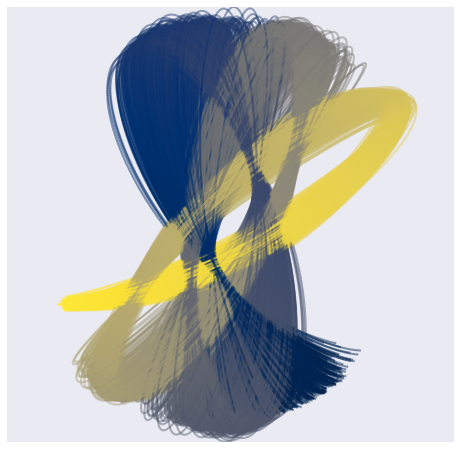

In [75]:
# plot particle trajectories
def make_segments(data, particle_index):
    points = np.array([data[:,particle_index, 0], data[:,particle_index, 1]]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    return segments

from matplotlib.collections import LineCollection
plt.figure(figsize=(8,8))
plt.style.use('seaborn-dark')
for i in range(N):
    lc = LineCollection(make_segments(paths, i), cmap='cividis', norm=plt.Normalize(0,1), alpha=0.5)
    # Set the values used for colormapping
    lc.set_array(np.linspace(1,0,T))
    lc.set_linewidth(2)
    line = plt.gca().add_collection(lc)
plt.xlim(np.min(paths), np.max(paths))
plt.ylim(np.min(paths), np.max(paths))
plt.xticks([])
plt.yticks([])
plt.savefig('normal.png', dpi=90)
plt.show()